In [5]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [6]:
# load the dataset
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('pima-indians-diabetes.data.csv', names=names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


There are eight input variables and one output variable (the last column). You will be learning a model to map rows of input variables (X) to an output variable (y), which is often summarized as y = f(X).

The variables can be summarized as follows:

`Input Variables (X):`

Number of times pregnant</br>
Plasma glucose concentration at 2 hours in an oral glucose tolerance test</br>
Diastolic blood pressure (mm Hg)</br>
Triceps skin fold thickness (mm)</br>
2-hour serum insulin (mu U/ml)</br>
Body mass index (weight in kg/(height in m)^2)</br>
Diabetes pedigree function</br>
Age (years)</br>

`Output Variables (y):`

Class variable (0 or 1)

In [7]:
# Splitting the data
array = df.values

X = array[:,0:8]
y = array[:,8]

In [8]:
# Define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Fit the keras model on the dataset
history = model.fit(X, y, epochs=50, batch_size=100)

Epoch 1/50


8/8 [==============================] - 1s 5ms/step - loss: 10.9035 - accuracy: 0.6120
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 9.1561 - accuracy: 0.6055
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 7.3986 - accuracy: 0.5924
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 5.5385 - accuracy: 0.5664
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 3.7537 - accuracy: 0.5352
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 2.4741 - accuracy: 0.4622
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 1.7965 - accuracy: 0.4922
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 1.3326 - accuracy: 0.5729
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 1.1959 - accuracy: 0.5911
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 1.1374 - accuracy: 0.6107
Epoch 11/50
8/8 [===================

In [12]:
# Evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 3ms/step - loss: 0.6359 - accuracy: 0.6680
Accuracy: 66.80


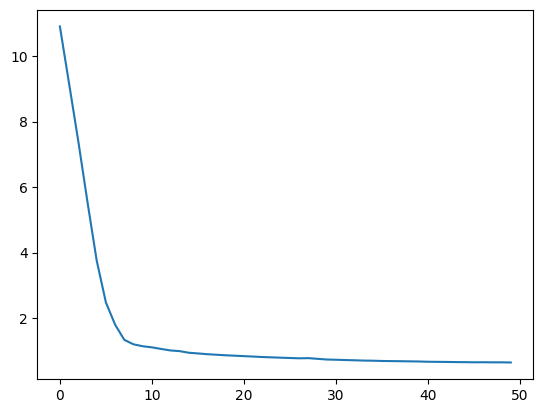

In [13]:
# Convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# Use Pandas native plot method
history_df['loss'].plot();

In [14]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]

24/24 [==============================] - 0s 2ms/step


In [15]:
# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), rounded[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


# TODO

- `Tune the Model.` Change the configuration of the model or training process and see if you can improve the performance of the model

- `Save the Model.` Update the tutorial to save the model to a file, then load it later and use it to make predictions

- `Separate, Train, and Test Datasets.` Split the loaded dataset into a training and test set and use one set to train the model and the other set to estimate the performance of the model on new data.

- `Learn a New Dataset.` Update the tutorial to use a different tabular dataset, perhaps from the UCI Machine Learning Repository.

### Tune the Model

In [36]:
# Define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the keras model on the dataset
history = model.fit(X, y, epochs=50, batch_size=100)

# Evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
8/8 [==============================] - 1s 2ms/step - loss: 4.2463 - accuracy: 0.6445
Epoch 2/50
8/8 [==============================] - 0s 754us/step - loss: 3.1308 - accuracy: 0.6198
Epoch 3/50
8/8 [==============================] - 0s 522us/step - loss: 2.3613 - accuracy: 0.5924
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 1.8476 - accuracy: 0.5508
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 1.6242 - accuracy: 0.5964
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 1.4838 - accuracy: 0.5938
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 1.3477 - accuracy: 0.6107
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 1.3197 - accuracy: 0.6198
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 1.2540 - accuracy: 0.6250
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 1.1970 - accuracy: 0.6224
Epoch 11/50
8/8 [==================

### Save the Model

In [24]:
import joblib

# save the model to disk
filename = 'finalized_model.joblib'
joblib.dump(model, filename)

['finalized_model.joblib']

### Separate, Train, and Test Datasets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [29]:
loaded_model = joblib.load(filename)

In [31]:
loaded_model.fit(x_train, y_train)

17/17 [==============================] - 1s 2ms/step - loss: 0.5859 - accuracy: 0.6984


In [37]:
_, accuracy = loaded_model.evaluate(X_test, y_test)
print(accuracy) 

8/8 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.7244
0.7244094610214233


### Learn a New Dataset

In [38]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [39]:
# load the dataset
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('pima-indians-diabetes.data.csv', names=names)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'pima-indians-diabetes.data.csv'